In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=.8)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap', min_assets=.8)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 92
from 2019-05-20 to 2019-07-09 - 114


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

113


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
VMBS,30,0.254233,0.230964,0.928934,1.573351,0.264901
MBB,30,0.255504,0.233698,0.923508,1.561757,0.325100
IEF,30,0.506315,0.597084,0.781518,3.065268,0.797894
TLH,30,0.688133,0.844669,0.767698,4.319568,0.958992
SPTL,30,0.891136,1.183410,0.719492,5.841329,1.628163
VGLT,30,0.894862,1.205766,0.709241,5.779305,1.634910
TLT,30,0.903125,1.237016,0.698004,5.855882,1.698879
GOVT,30,0.365177,0.472561,0.688789,2.209655,0.657641
SCHR,30,0.353599,0.456468,0.687708,2.059242,0.618182


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted MBB 0.893 -0.383
evicted IEF 0.897 -0.648
evicted IPE 0.674 -0.534
evicted USMV 0.877 -0.509
retry backlogs ['SCHD', 'RPG', 'JKE', 'FEX', 'JHML', 'SPHQ', 'FTC', 'ADX', 'LRGF', 'VONV', 'ONEQ', 'DGRW', 'SCHK', 'QDF', 'SCHV', 'RSP', 'SPLG', 'FTCS', 'DLN', 'HDV', 'VV', 'VTI', 'VONG', 'VYM', 'DGRO', 'DHS', 'SUSA', 'VIG', 'FVD', 'SPTM', 'QQQ', 'SDY', 'FTA', 'CFO', 'SCHB', 'IWD', 'VOO', 'DSI', 'NOBL', 'VTV', 'PRF', 'IWB', 'IYY', 'VONE', 'MGV', 'IVW', 'VOOG', 'SCHX', 'IUSV', 'VTIP', 'PWV', 'IVV', 'VGSH', 'IWF', 'SCHR', 'TDTT', 'STIP', 'TLH', 'SPLV', 'SPY', 'SPYG', 'SHY', 'SCHO', 'VGIT', 'IEI', 'SPTS', 'SPYV', 'GOVT', 'VMBS', 'IUSG', 'MGC', 'FNDX', 'SCHP', 'MGK', 'SPTL', 'QUAL', 'ITOT', 'VUG', 'TIP', 'TLT', 'VGLT', 'IVE', 'IWV', 'XLG', 'OEF', 'MTUM', 'DIA', 'JKD', 'RDIV', 'PKW', 'FV', 'DTN', 'IWY', 'MOAT', 'FPX', 'SDOG', 'SPYD', 'RPV', 'GSLC', 'FDL', 'TILT', 'DVY', 'VOOV', 'CET', 'USA', 'RWL'] at 0.905 - 1.651
evicted SPTS 0.792 -0.495
evicted SCHP 0.900 -0.507
evicted VMBS 0.819 -0.536

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,0.902412,0.516116,-0.171180,0.634670,0.936612,1.204172,2.137933,1.671582,5.660473,0.986508
TLH,30.0,0.688133,0.844669,-0.815692,-0.012265,0.590752,1.097541,2.693552,0.767698,4.319568,0.958992
EDV,30.0,1.163957,1.668171,-2.141637,0.071757,0.650480,1.620299,5.231127,0.673956,7.707812,2.610604
QQQ,30.0,1.041333,2.627463,-4.512806,-0.707288,0.811754,2.907064,7.659307,0.381223,6.185914,6.440085
VLUE,30.0,0.828631,2.245446,-3.985411,0.059789,1.397851,1.917667,4.888826,0.351355,4.407866,6.135276


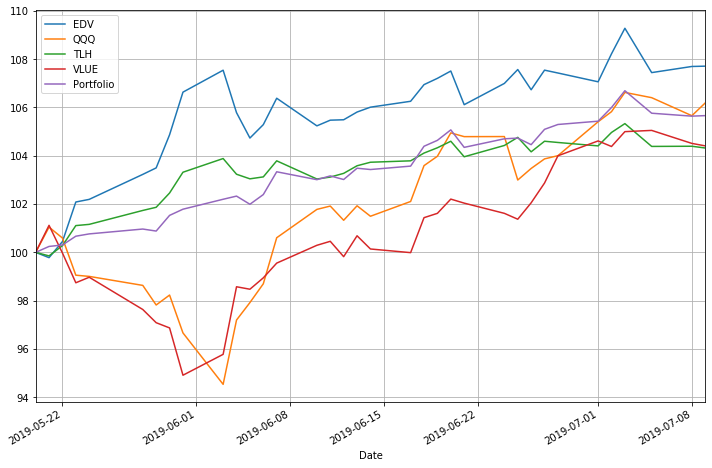

In [4]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.1)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)

{'EDV': 0.57, 'MTUM': 0.43}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,1.134966,0.845460,-0.815530,0.836829,1.203481,1.680291,2.879773,1.295488,7.519792,1.389710
EDV,30.0,1.163957,1.668171,-2.141637,0.071757,0.650480,1.620299,5.231127,0.673956,7.707812,2.610604
MTUM,30.0,1.126791,2.071641,-2.116999,-0.398534,1.261660,2.235094,6.048635,0.524757,7.270556,2.638699


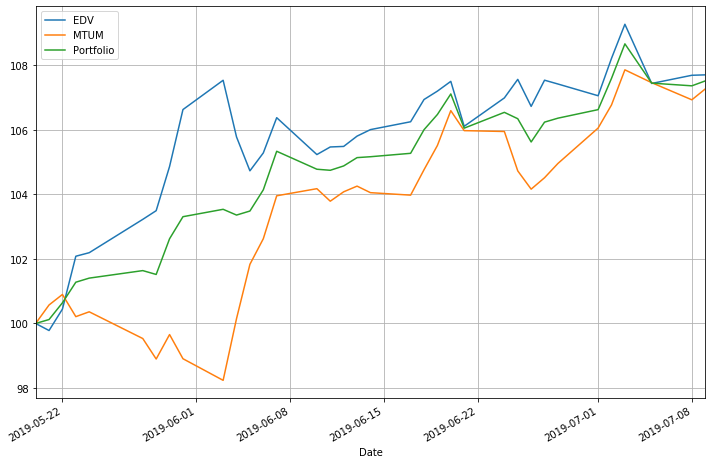

In [7]:
quote2 = Quote(['EDV', 'MTUM'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)